# Stock Market Prediction

### Project Details:- 
Before we get into the program’s implementation to predict the stock market values, let us visualise the data on which we will be working. Here, we will be analysing the stock value of Microsoft Corporation (MSFT) from the National Association of Securities Dealers Automated Quotations (NASDAQ). The stock value data will be presented in the form of a Comma Separated File (.csv), which can be opened and viewed using Excel or a Spreadsheet.


### Exploratory Data Analysis of MSFT dataset

In [91]:
from google.colab import files
uploaded = files.upload()

Saving MSFT.csv to MSFT (1).csv


In [87]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [92]:
df = pd.read_csv('MSFT.csv')

In [93]:
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400


In [94]:
df.tail(5)

,Date,Open,High,Low,Close,Adj Close,Volume
8852,2021-04-27,261.579987,263.190002,260.119995,261.970001,261.970001,31014200
8853,2021-04-28,256.079987,256.540008,252.949997,254.559998,254.559998,46903100
8854,2021-04-29,255.460007,256.100006,249.000000,252.509994,252.509994,40589000
8855,2021-04-30,249.740006,253.080002,249.600006,252.179993,252.179993,30929200
8856,2021-05-03,253.399994,254.350006,251.119995,251.860001,251.860001,19598900


In [95]:
df.shape

(8857, 7)

In [96]:
df.info

<bound method DataFrame.info of             Date        Open        High  ...       Close   Adj Close      Volume
0     1986-03-13    0.088542    0.101563  ...    0.097222    0.061751  1031788800
1     1986-03-14    0.097222    0.102431  ...    0.100694    0.063956   308160000
2     1986-03-17    0.100694    0.103299  ...    0.102431    0.065059   133171200
3     1986-03-18    0.102431    0.103299  ...    0.099826    0.063405    67766400
4     1986-03-19    0.099826    0.100694  ...    0.098090    0.062302    47894400
...          ...         ...         ...  ...         ...         ...         ...
8852  2021-04-27  261.579987  263.190002  ...  261.970001  261.970001    31014200
8853  2021-04-28  256.079987  256.540008  ...  254.559998  254.559998    46903100
8854  2021-04-29  255.460007  256.100006  ...  252.509994  252.509994    40589000
8855  2021-04-30  249.740006  253.080002  ...  252.179993  252.179993    30929200
8856  2021-05-03  253.399994  254.350006  ...  251.860001  251.860

In [97]:
df.isnull().sum() ## checking the null values in the dataset

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [98]:
df.columns ## checking the columns name in the dataset

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [100]:
df.info() ## successfully converted to datetime datatype

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8857 entries, 0 to 8856
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       8857 non-null   object 
 1   Open       8857 non-null   float64
 2   High       8857 non-null   float64
 3   Low        8857 non-null   float64
 4   Close      8857 non-null   float64
 5   Adj Close  8857 non-null   float64
 6   Volume     8857 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 484.5+ KB


In [101]:
df.columns=df.columns.str.upper() #Renaming the columns in uppercase


In [102]:
df.head(5)

,DATE,OPEN,HIGH,LOW,CLOSE,ADJ CLOSE,VOLUME
0,1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800
1,1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000
2,1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200
3,1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400
4,1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400


In [103]:
df['DATE']= pd.to_datetime(df['DATE'],format = "%Y-%m-%d") #converting 'DATE' from object to datetime Dtype


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8857 entries, 0 to 8856
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   DATE       8857 non-null   datetime64[ns]
 1   OPEN       8857 non-null   float64       
 2   HIGH       8857 non-null   float64       
 3   LOW        8857 non-null   float64       
 4   CLOSE      8857 non-null   float64       
 5   ADJ CLOSE  8857 non-null   float64       
 6   VOLUME     8857 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 484.5 KB


### Lets see the relationship between the features using various plots

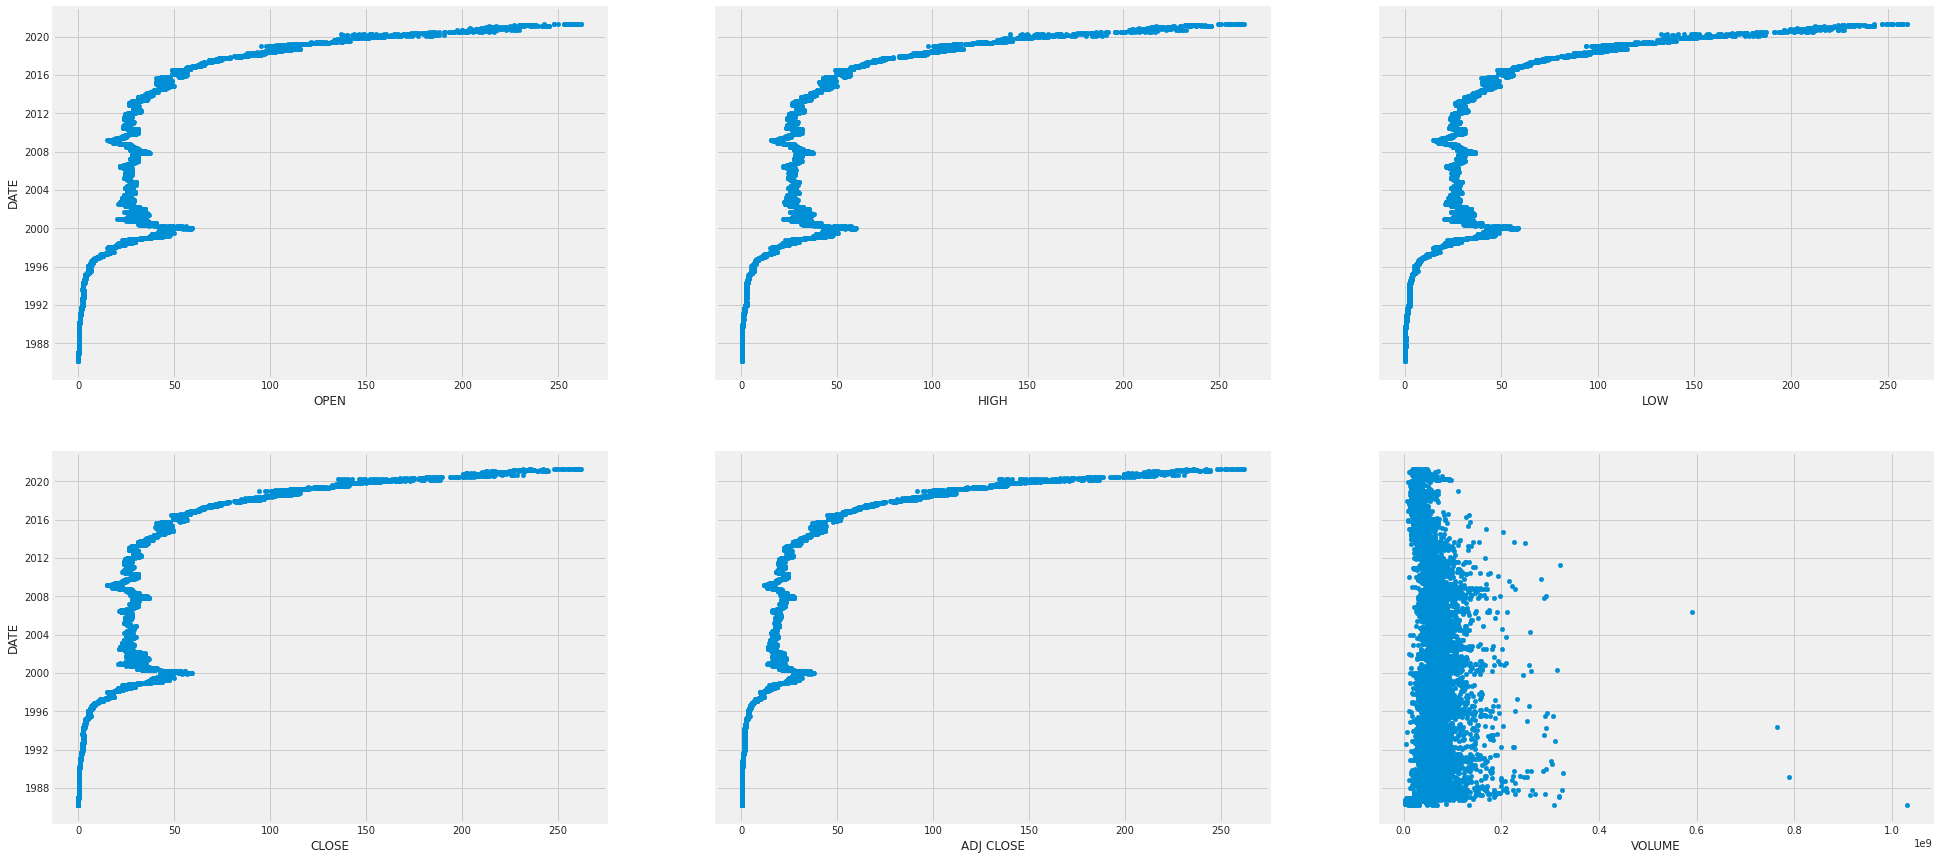

In [105]:
fig,axs=plt.subplots(2,3,sharey=True)
df.plot(kind='scatter', x='OPEN', y='DATE', ax=axs[0,0], figsize=(30, 15))
df.plot(kind='scatter', x='HIGH', y='DATE', ax=axs[0,1])
df.plot(kind='scatter', x='LOW', y='DATE', ax=axs[0,2])
df.plot(kind='scatter', x='CLOSE', y='DATE', ax=axs[1,0])
df.plot(kind='scatter', x='ADJ CLOSE', y='DATE', ax=axs[1,1])
df.plot(kind='scatter', x='VOLUME', y='DATE', ax=axs[1,2])

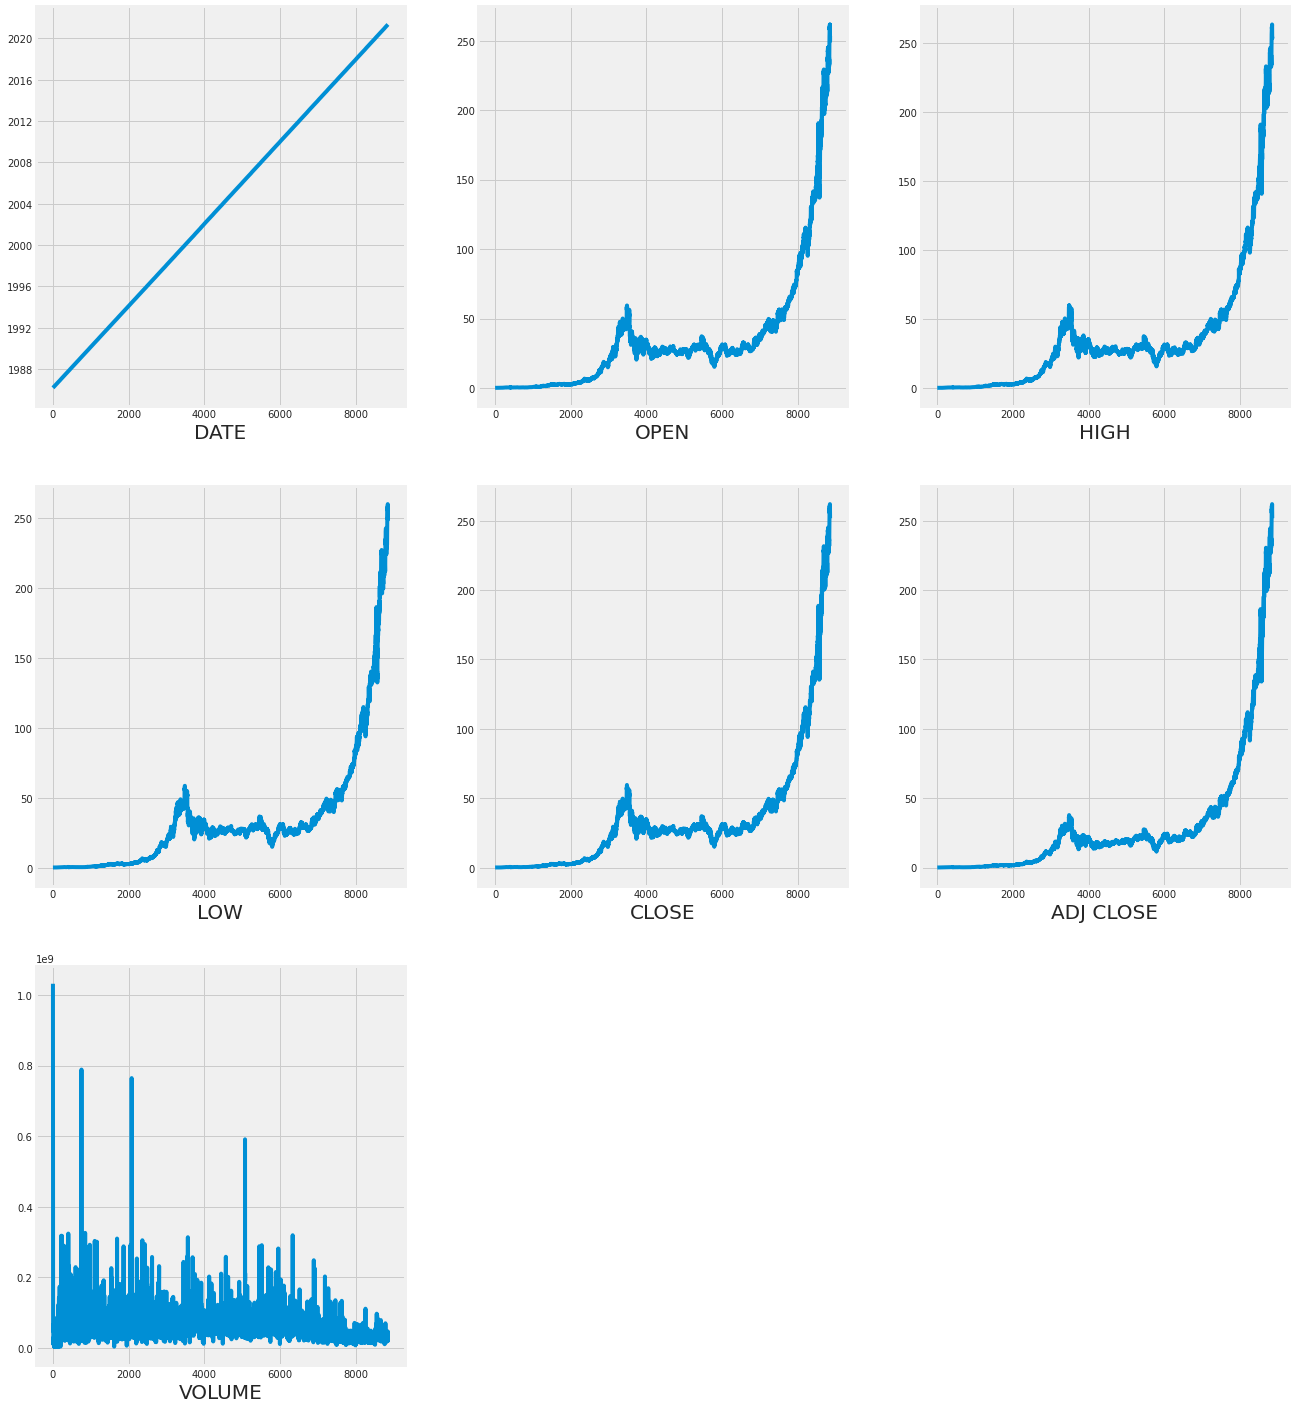

In [106]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in df:
    if plotnumber<=7:
        ax=plt.subplot(3,3,plotnumber)
        plt.plot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()

--> Open, High, Low, Close, Adj Close are showing similar trends sudden increase after 2000 than decrease and increasing eventually with respect to time.

In [107]:
df=df.set_index('DATE') #Setting the Date feature as an index

In [108]:
df

,OPEN,HIGH,LOW,CLOSE,ADJ CLOSE,VOLUME
DATE,,,,,,
1986-03-13,0.088542,0.101563,0.088542,0.097222,0.061751,1031788800
1986-03-14,0.097222,0.102431,0.097222,0.100694,0.063956,308160000
1986-03-17,0.100694,0.103299,0.100694,0.102431,0.065059,133171200
1986-03-18,0.102431,0.103299,0.098958,0.099826,0.063405,67766400
1986-03-19,0.099826,0.100694,0.097222,0.098090,0.062302,47894400
...,...,...,...,...,...,...
2021-04-27,261.579987,263.190002,260.119995,261.970001,261.970001,31014200
2021-04-28,256.079987,256.540008,252.949997,254.559998,254.559998,46903100
2021-04-29,255.460007,256.100006,249.000000,252.509994,252.509994,40589000


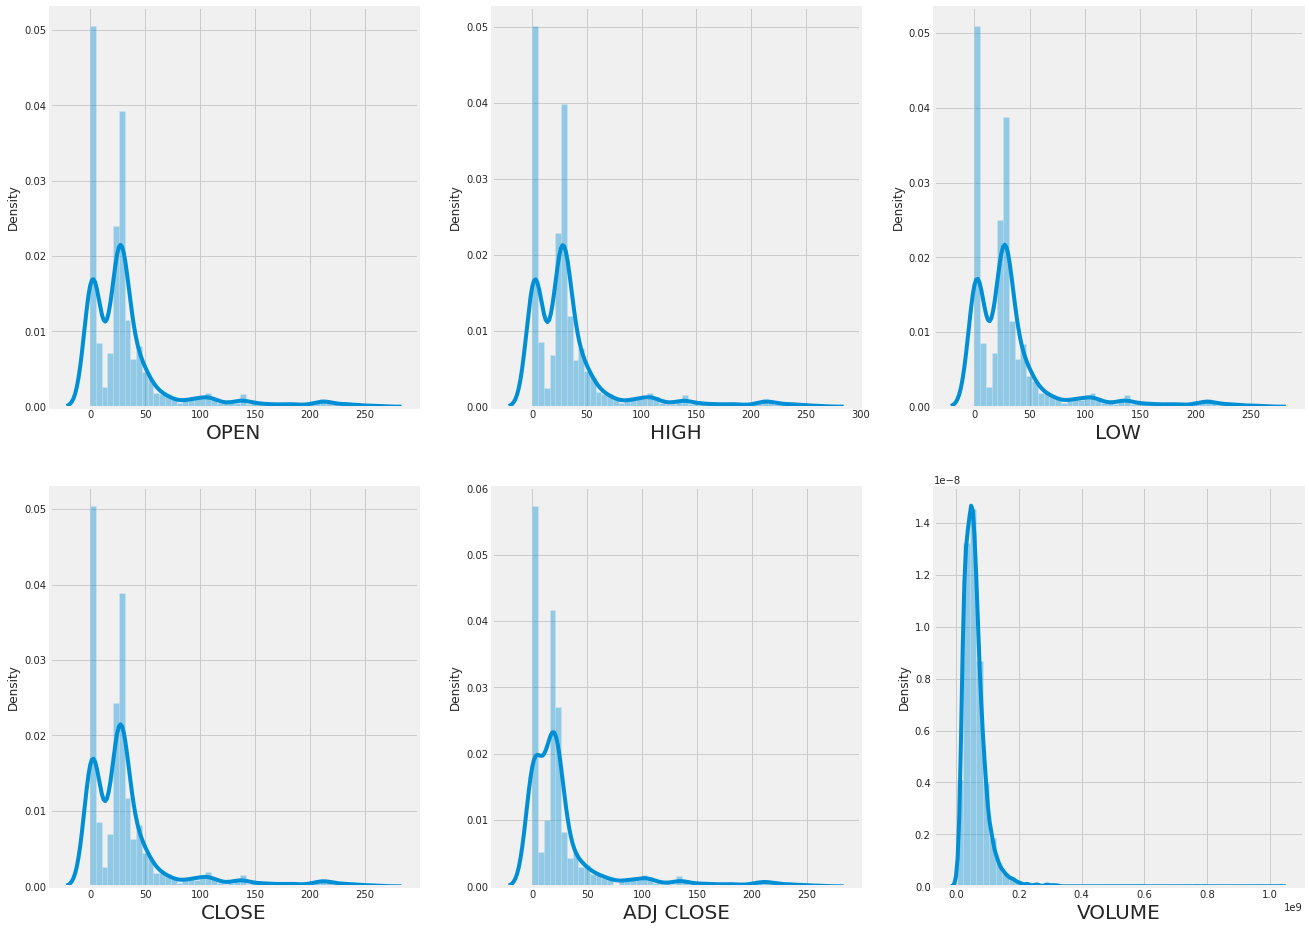

In [109]:
## ploting the features with respect to date
plt.figure(figsize=(20,25))
plotnumber=1
for column in df:
    if plotnumber<=7:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()

--> Above 5 features show similar statical distribution data i.e decreasing after 100. Max density is 1.6      

--> It also shows all the features are highly correlated with each other except volume

### lets check for outliers

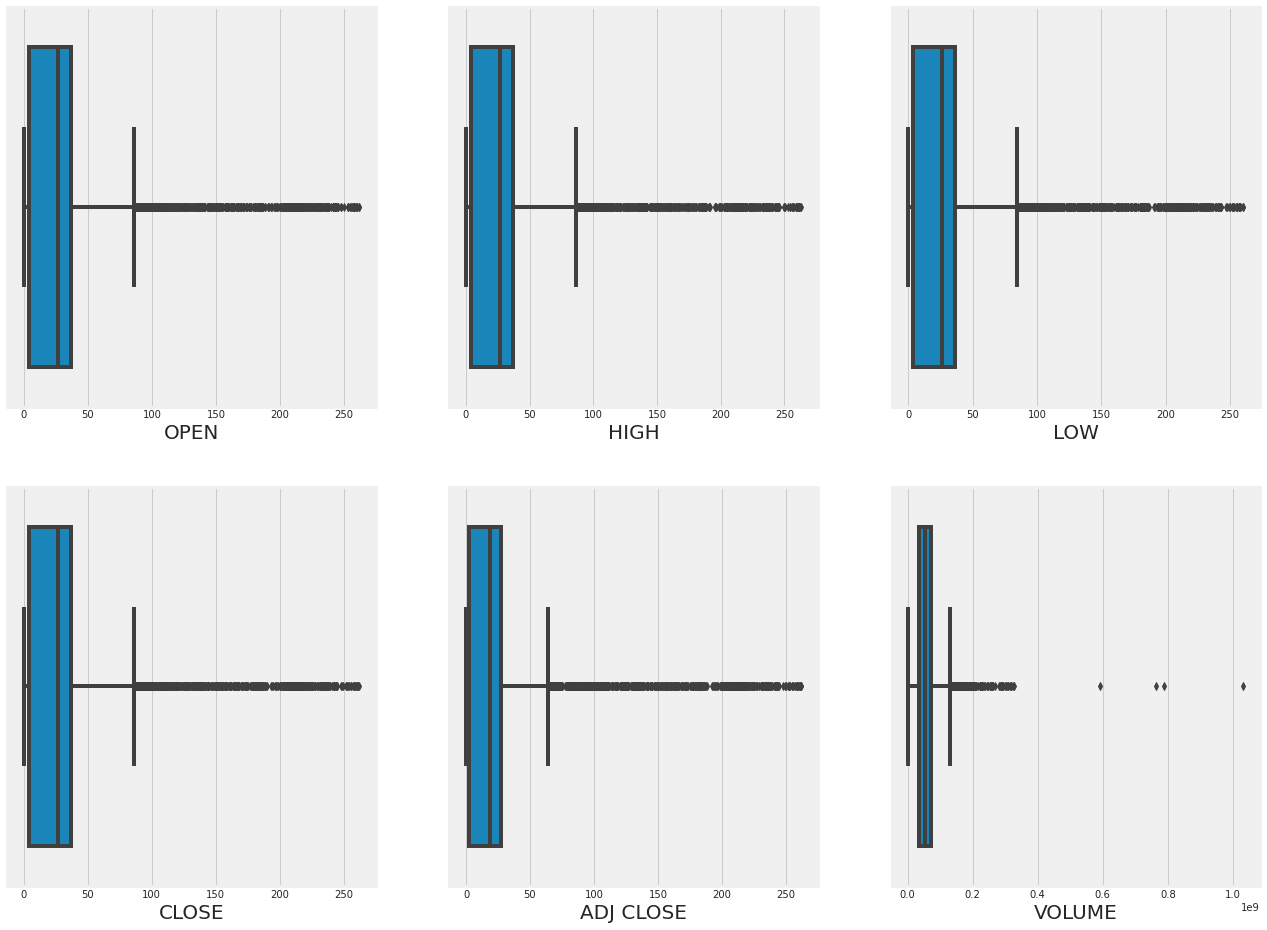

In [110]:
plt.figure(figsize=(20,25))
plotnumber=1
for column in df:
    if plotnumber<=7:
        ax=plt.subplot(3,3,plotnumber)
        sns.boxplot(df[column])
        plt.xlabel(column, fontsize=20)
    plotnumber+=1
plt.show()

Outliers are observed in Volume

## EDA OF COMBINED DATASET (MSFT + STOCK DATA)

In [21]:
from google.colab import files
uploaded = files.upload()

Saving stock.csv to stock.csv


In [22]:
data=pd.read_csv('stock.csv')

In [23]:
data.head(5)

,Date,Open,High,Low,Close,Volume,OpenInt,Stock
0,07-09-1984,0.42388,0.42902,0.41874,0.42388,23220030,0,AAPL
1,10-09-1984,0.42388,0.42516,0.41366,0.42134,18022532,0,AAPL
2,11-09-1984,0.42516,0.43668,0.42516,0.42902,42498199,0,AAPL
3,12-09-1984,0.42902,0.43157,0.41618,0.41618,37125801,0,AAPL
4,13-09-1984,0.43927,0.44052,0.43927,0.43927,57822062,0,AAPL


In [24]:
data.tail(5)

,Date,Open,High,Low,Close,Volume,OpenInt,Stock
19581,06-11-2017,178.56,180.450,178.310,180.17,13275578,0,FB
19582,07-11-2017,180.50,180.748,179.403,180.25,12903836,0,FB
19583,08-11-2017,179.79,180.350,179.110,179.56,10467606,0,FB
19584,09-11-2017,178.31,179.400,177.090,179.30,12602188,0,FB
19585,10-11-2017,178.35,179.100,177.960,178.46,11060355,0,FB


In [25]:
data.describe()

,Open,High,Low,Close,Volume,OpenInt
count,19586.000000,19586.000000,19586.000000,19586.000000,1.958600e+04,19586.0
mean,37.408582,37.881571,36.906405,37.406667,8.100395e+07,0.0
std,59.492049,60.287797,58.622548,59.480058,7.982366e+07,0.0
min,0.067200,0.067200,0.067200,0.067200,0.000000e+00,0.0
25%,1.412300,1.440600,1.384100,1.412300,3.385552e+07,0.0
50%,19.649500,19.933000,19.363000,19.640000,6.294731e+07,0.0
75%,38.605000,39.075750,38.229250,38.655500,1.010604e+08,0.0
max,386.690000,389.610000,379.345000,385.000000,2.069770e+09,0.0


In [26]:
data.shape

(19586, 8)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19586 entries, 0 to 19585
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     19586 non-null  object 
 1   Open     19586 non-null  float64
 2   High     19586 non-null  float64
 3   Low      19586 non-null  float64
 4   Close    19586 non-null  float64
 5   Volume   19586 non-null  int64  
 6   OpenInt  19586 non-null  int64  
 7   Stock    19586 non-null  object 
dtypes: float64(4), int64(2), object(2)
memory usage: 1.2+ MB


In [28]:
data.duplicated().sum()

0

In [29]:
data.isnull().sum()

Date       0
Open       0
High       0
Low        0
Close      0
Volume     0
OpenInt    0
Stock      0
dtype: int64

In [30]:
data.columns=data.columns.str.upper() #Renaming the columns in uppercase


In [31]:
data.head(2)

,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,OPENINT,STOCK
0,07-09-1984,0.42388,0.42902,0.41874,0.42388,23220030,0,AAPL
1,10-09-1984,0.42388,0.42516,0.41366,0.42134,18022532,0,AAPL


In [32]:
data['DATE']= pd.to_datetime(data['DATE'],format = "%d-%m-%Y") #converting 'DATE' from object to datetime Dtype


In [33]:
data.info()#successfully converted 'DATE' dtype to datetime

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19586 entries, 0 to 19585
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     19586 non-null  datetime64[ns]
 1   OPEN     19586 non-null  float64       
 2   HIGH     19586 non-null  float64       
 3   LOW      19586 non-null  float64       
 4   CLOSE    19586 non-null  float64       
 5   VOLUME   19586 non-null  int64         
 6   OPENINT  19586 non-null  int64         
 7   STOCK    19586 non-null  object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(1)
memory usage: 1.2+ MB


In [34]:
data['STOCK'].unique()#unique values in 'STOCK' feature

array(['AAPL', 'TSLA', 'MSFT', 'FB'], dtype=object)

In [35]:
data.groupby(['STOCK']).mean()#grouping by the mean of 'STOCK' feature

,OPEN,HIGH,LOW,CLOSE,VOLUME,OPENINT
STOCK,,,,,,
AAPL,22.284350,22.495867,22.054244,22.281018,1.066416e+08,0.0
FB,83.543667,84.384940,82.630555,83.543827,3.770716e+07,0.0
MSFT,18.977859,19.187219,18.773635,18.984698,7.945800e+07,0.0
TSLA,150.389741,152.898737,147.688064,150.355047,4.416508e+06,0.0


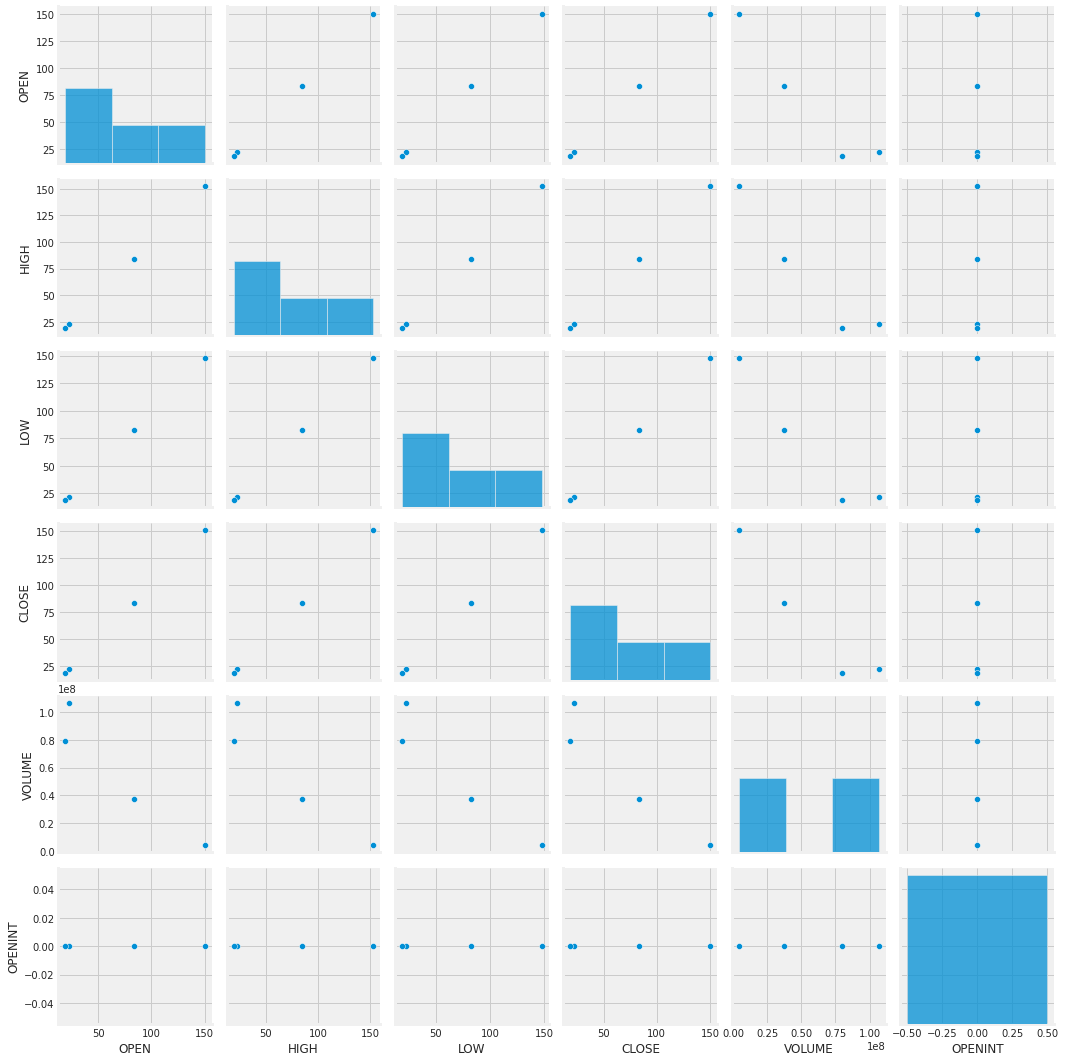

In [36]:
sns.pairplot(data.groupby(['STOCK']).mean())#pairplot

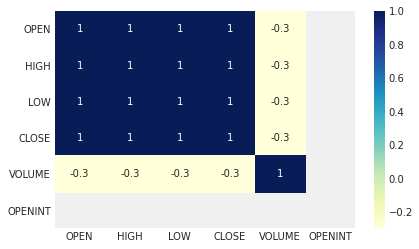

In [37]:
sns.heatmap(data.corr(),annot=True,cmap = "YlGnBu") #Graphical representation of data using colors to visualize the value of the matrix.


In [38]:
data=data.reset_index()


In [39]:
data.head()


,index,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,OPENINT,STOCK
0,0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0,AAPL
1,1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0,AAPL
2,2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0,AAPL
3,3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0,AAPL
4,4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0,AAPL


Text(0.5, 1.0, "PLOT SHOWING DISTRIBUTION OF VALUES OF 'DATE'")

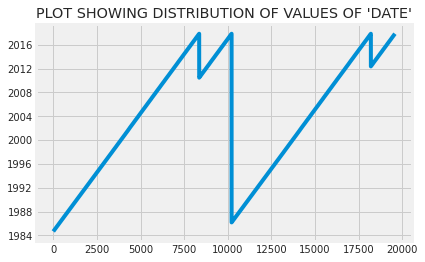

In [40]:
data['DATE'].plot()
plt.title("PLOT SHOWING DISTRIBUTION OF VALUES OF 'DATE'")


## EDA OF INDIVIDUAL STOCK

In [41]:
data.head()

,index,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,OPENINT,STOCK
0,0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,0,AAPL
1,1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,0,AAPL
2,2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,0,AAPL
3,3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,0,AAPL
4,4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,0,AAPL


In [42]:
data.drop(columns=['OPENINT'], inplace=True)#Dropping the OPENINT column

In [43]:
data.head()

,index,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,STOCK
0,0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,AAPL
1,1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,AAPL
2,2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,AAPL
3,3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,AAPL
4,4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,AAPL


In [44]:
stock_data = stock_data=data.groupby('STOCK')#grouping the values by STOCK

In [45]:
stock_data.head()#values grouped

,index,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,STOCK
0,0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,AAPL
1,1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,AAPL
2,2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,AAPL
3,3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,AAPL
4,4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,AAPL
8364,8364,2010-06-28,17.00000,17.00000,17.00000,17.00000,0,TSLA
8365,8365,2010-06-29,19.00000,25.00000,17.54000,23.89000,18783276,TSLA
8366,8366,2010-06-30,25.79000,30.42000,23.30000,23.83000,17194394,TSLA
8367,8367,2010-07-01,25.00000,25.92000,20.27000,21.96000,8229863,TSLA
8368,8368,2010-07-02,23.00000,23.10000,18.71000,19.20000,5141807,TSLA


In [46]:
data['STOCK'].unique()#unique values in stock

array(['AAPL', 'TSLA', 'MSFT', 'FB'], dtype=object)

In [47]:
#Diving the data on the basis of company
df_AAPL = data[data.STOCK=='AAPL']
df_TSLA = data[data.STOCK=='TSLA']
df_MSFT = data[data.STOCK=='MSFT']
df_FB   =data[data.STOCK=='FB']

In [48]:
df_AAPL.head() #displaying the dataframes created

,index,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,STOCK
0,0,1984-09-07,0.42388,0.42902,0.41874,0.42388,23220030,AAPL
1,1,1984-09-10,0.42388,0.42516,0.41366,0.42134,18022532,AAPL
2,2,1984-09-11,0.42516,0.43668,0.42516,0.42902,42498199,AAPL
3,3,1984-09-12,0.42902,0.43157,0.41618,0.41618,37125801,AAPL
4,4,1984-09-13,0.43927,0.44052,0.43927,0.43927,57822062,AAPL


In [49]:
df_TSLA.head()

,index,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,STOCK
8364,8364,2010-06-28,17.00,17.00,17.00,17.00,0,TSLA
8365,8365,2010-06-29,19.00,25.00,17.54,23.89,18783276,TSLA
8366,8366,2010-06-30,25.79,30.42,23.30,23.83,17194394,TSLA
8367,8367,2010-07-01,25.00,25.92,20.27,21.96,8229863,TSLA
8368,8368,2010-07-02,23.00,23.10,18.71,19.20,5141807,TSLA


In [50]:
df_MSFT.head()

,index,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,STOCK
10222,10222,1986-03-13,0.06720,0.07533,0.06720,0.07533,1371330506,MSFT
10223,10223,1986-03-14,0.07533,0.07533,0.07533,0.07533,409569463,MSFT
10224,10224,1986-03-17,0.07533,0.07533,0.07533,0.07533,176995245,MSFT
10225,10225,1986-03-18,0.07533,0.07533,0.07533,0.07533,90067008,MSFT
10226,10226,1986-03-19,0.07533,0.07533,0.07533,0.07533,63655515,MSFT


In [51]:
df_FB.head()

,index,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,STOCK
18205,18205,2012-05-18,42.05,45.00,38.00,38.23,580438450,FB
18206,18206,2012-05-21,36.53,36.66,33.00,34.03,169418988,FB
18207,18207,2012-05-22,32.61,33.59,30.94,31.00,101876406,FB
18208,18208,2012-05-23,31.37,32.50,31.36,32.00,73678512,FB
18209,18209,2012-05-24,32.95,33.21,31.77,33.03,42560731,FB


In [52]:
companies=[df_AAPL, df_MSFT,df_TSLA,df_FB]
company_name=['df_AAPL', 'df_MSFT','df_TSLA','df_FB']

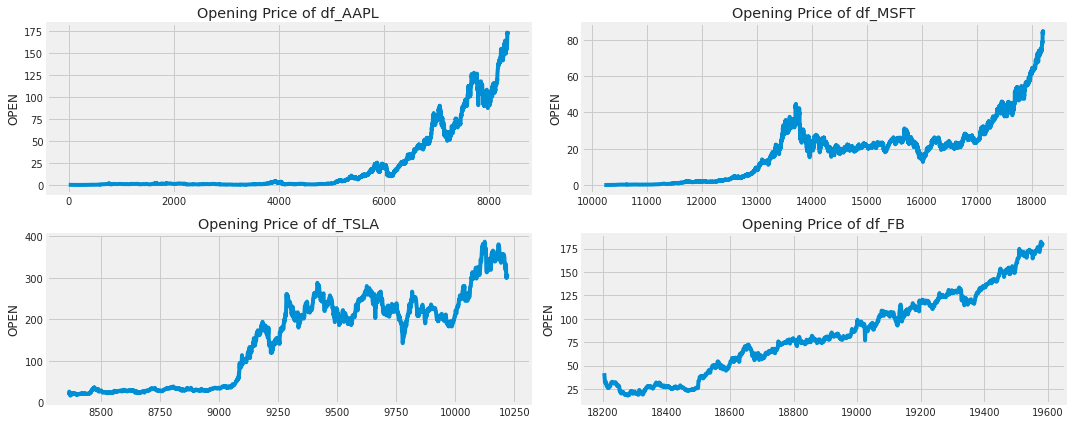

In [53]:
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(companies, 1):
    plt.subplot(2, 2, i)
    company['OPEN'].plot()
    plt.ylabel('OPEN')
    plt.xlabel(None)
    plt.title(f"Opening Price of {company_name[i - 1]}")
    
plt.tight_layout()

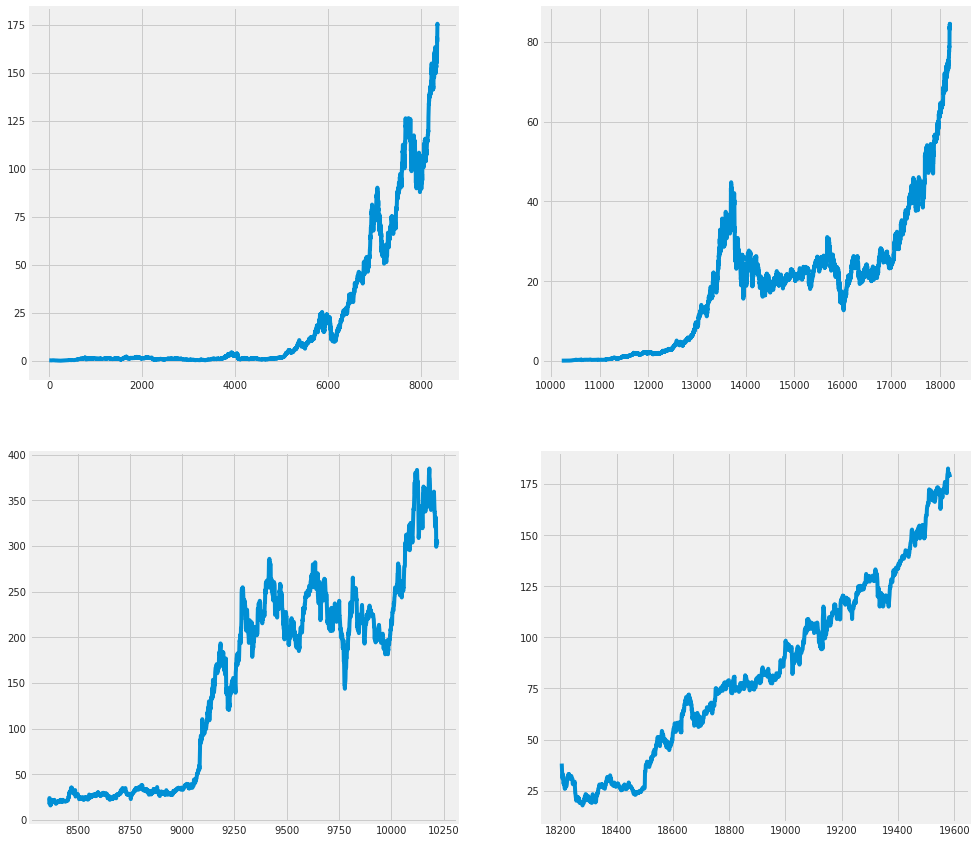

In [54]:
nrow=2
ncol=2
fig, axes = plt.subplots(nrow, ncol,figsize=(15,15))

# plot counter
count=0
for r in range(nrow):
    for c in range(ncol):
        companies[count]['CLOSE'].plot(ax=axes[r,c])
        count+=1

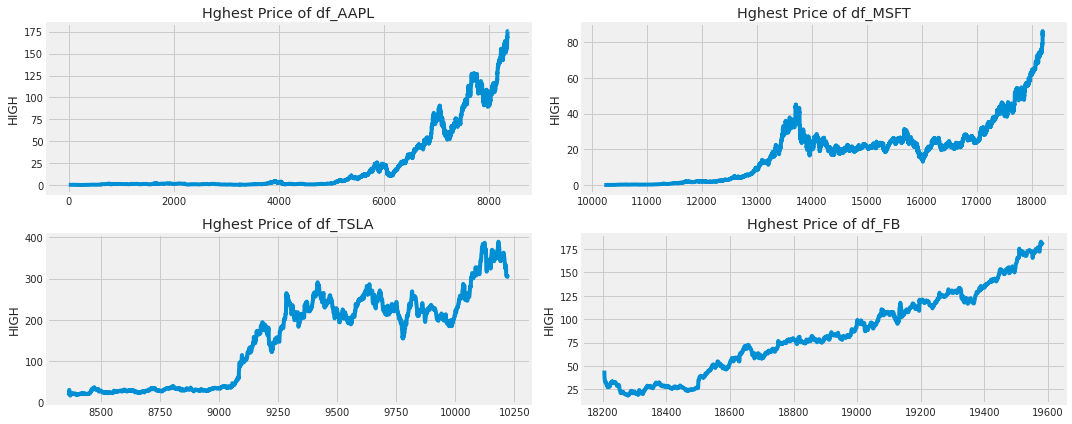

In [55]:
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(companies, 1):
    plt.subplot(2, 2, i)
    company['HIGH'].plot()
    plt.ylabel('HIGH')
    plt.xlabel(None)
    plt.title(f"Hghest Price of {company_name[i - 1]}")
    
plt.tight_layout()

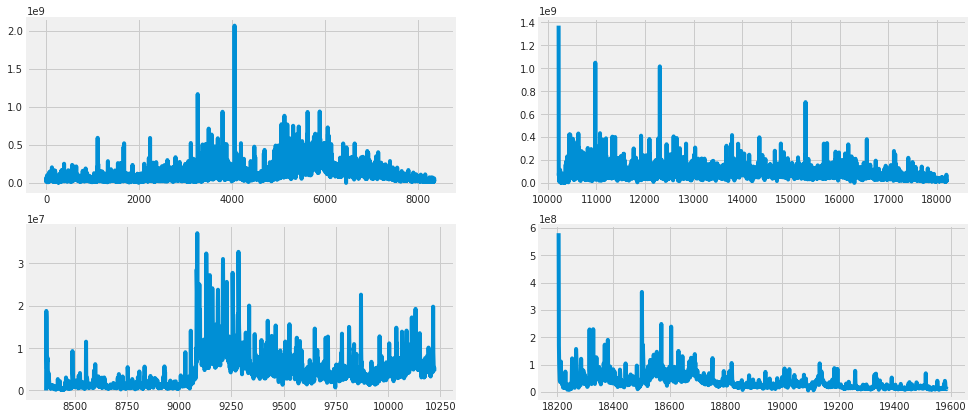

In [56]:
nrow=2
ncol=2
fig, axes = plt.subplots(nrow, ncol,figsize=(15,7))

# plot counter
count=0
for r in range(nrow):
    for c in range(ncol):
        companies[count]['VOLUME'].plot(ax=axes[r,c])
        count+=1

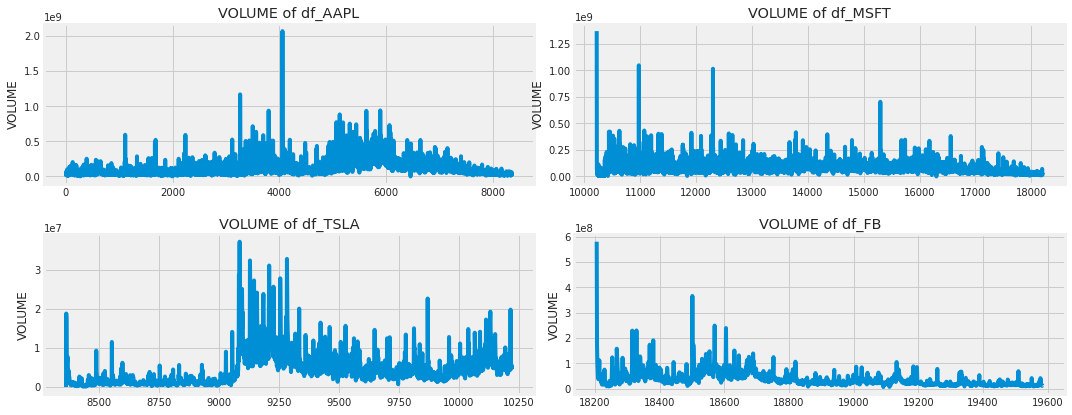

In [57]:
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(companies, 1):
    plt.subplot(2, 2, i)
    company['VOLUME'].plot()
    plt.ylabel('VOLUME')
    plt.xlabel(None)
    plt.title(f"VOLUME of {company_name[i - 1]}")
    
plt.tight_layout()

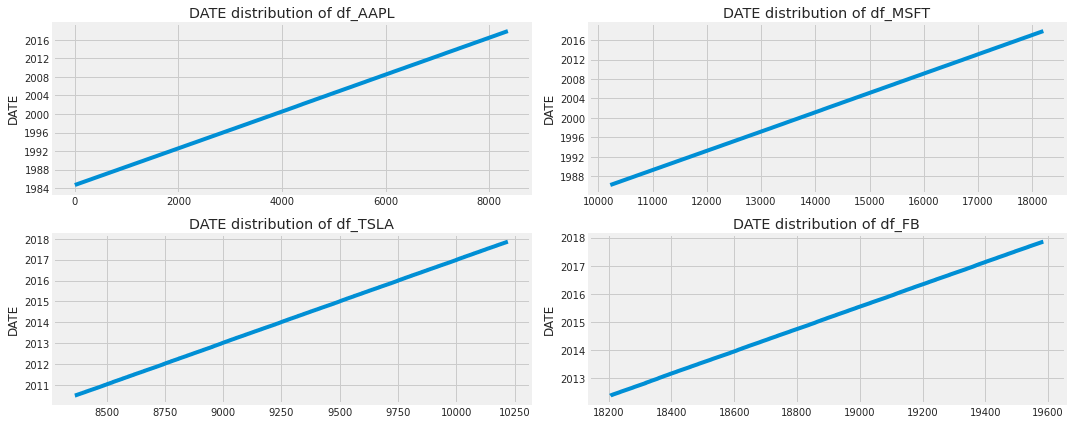

In [58]:
plt.figure(figsize=(15, 6))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, company in enumerate(companies, 1):
    plt.subplot(2, 2, i)
    company['DATE'].plot()
    plt.ylabel('DATE')
    plt.xlabel(None)
    plt.title(f"DATE distribution of {company_name[i - 1]}")
    
plt.tight_layout()

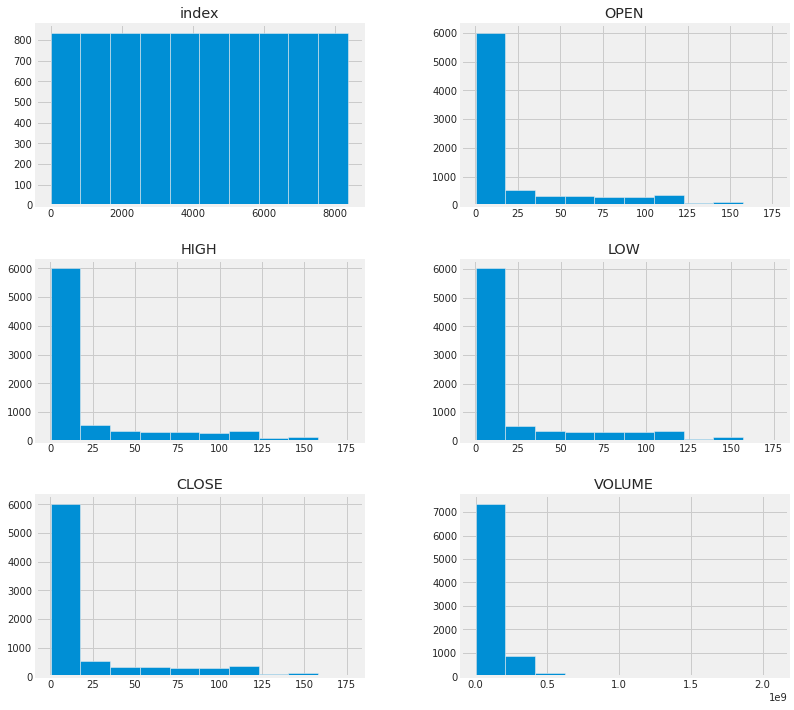

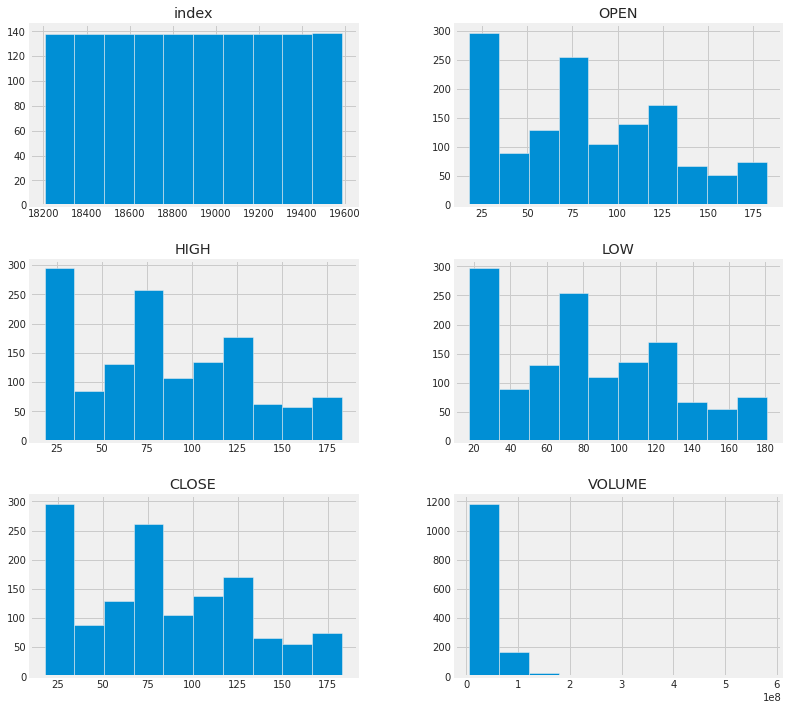

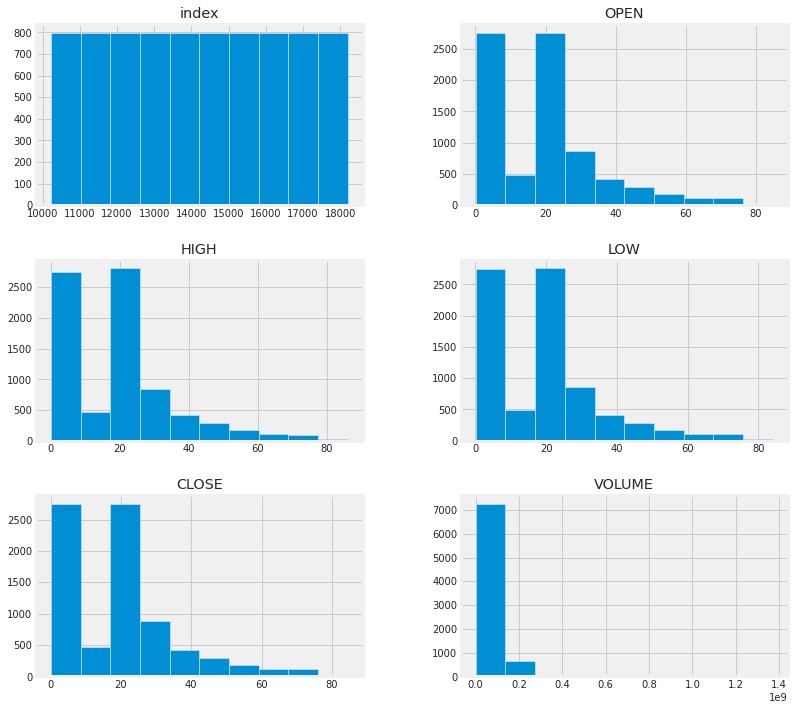

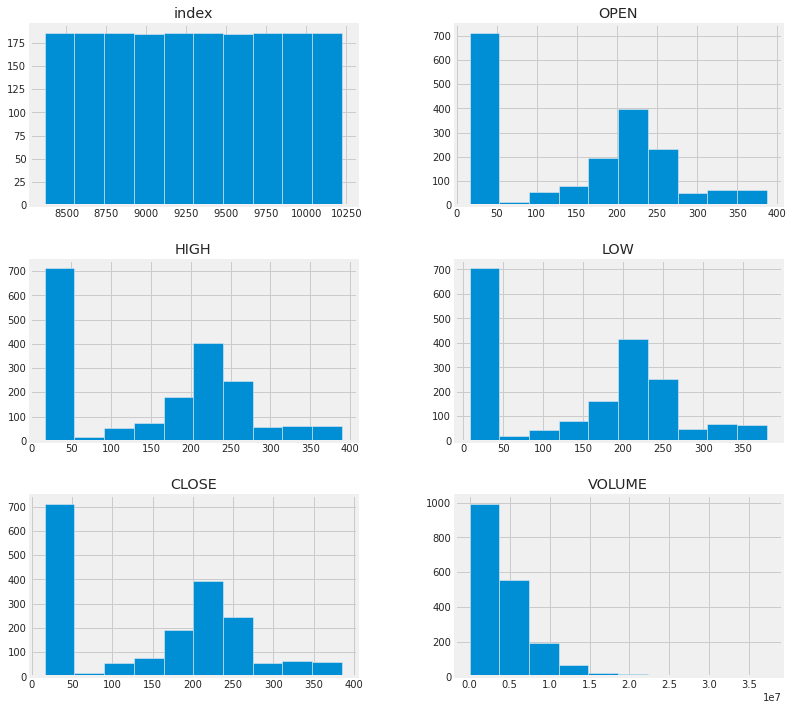

In [59]:
data.groupby("STOCK").hist(figsize=(12, 12));

In [60]:
cp_AAPL=pd.DataFrame(df_AAPL['CLOSE']) 
cp_AAPL.rename(columns={'CLOSE':'CP_AAPL'},inplace=True)
cp_MSFT=pd.DataFrame(df_MSFT['CLOSE']) 
cp_MSFT.rename(columns={'CLOSE':'CP_MSFT'},inplace=True)
cp_TSLA=pd.DataFrame(df_TSLA['CLOSE']) 
cp_TSLA.rename(columns={'CLOSE':'CP_TSLA'},inplace=True)
cp_FB=pd.DataFrame(df_FB['CLOSE']) 
cp_FB.rename(columns={'CLOSE':'CP_FB'},inplace=True)


In [61]:
closing_df= pd.concat([cp_AAPL,cp_MSFT,cp_TSLA,cp_FB], axis=1)


In [62]:
closing_df.head()


,CP_AAPL,CP_MSFT,CP_TSLA,CP_FB
0,0.42388,NaN,NaN,NaN
1,0.42134,NaN,NaN,NaN
2,0.42902,NaN,NaN,NaN
3,0.41618,NaN,NaN,NaN
4,0.43927,NaN,NaN,NaN


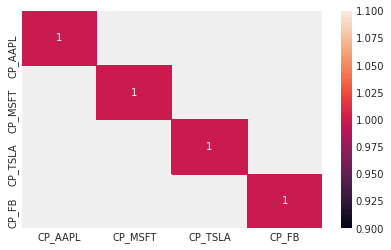

In [63]:
sns.heatmap(closing_df.corr(), annot=True)


In [64]:
df_MSFT=df_MSFT.set_index(df_MSFT['DATE'])
df_MSFT.head()


,index,DATE,OPEN,HIGH,LOW,CLOSE,VOLUME,STOCK
DATE,,,,,,,,
1986-03-13,10222,1986-03-13,0.06720,0.07533,0.06720,0.07533,1371330506,MSFT
1986-03-14,10223,1986-03-14,0.07533,0.07533,0.07533,0.07533,409569463,MSFT
1986-03-17,10224,1986-03-17,0.07533,0.07533,0.07533,0.07533,176995245,MSFT
1986-03-18,10225,1986-03-18,0.07533,0.07533,0.07533,0.07533,90067008,MSFT
1986-03-19,10226,1986-03-19,0.07533,0.07533,0.07533,0.07533,63655515,MSFT


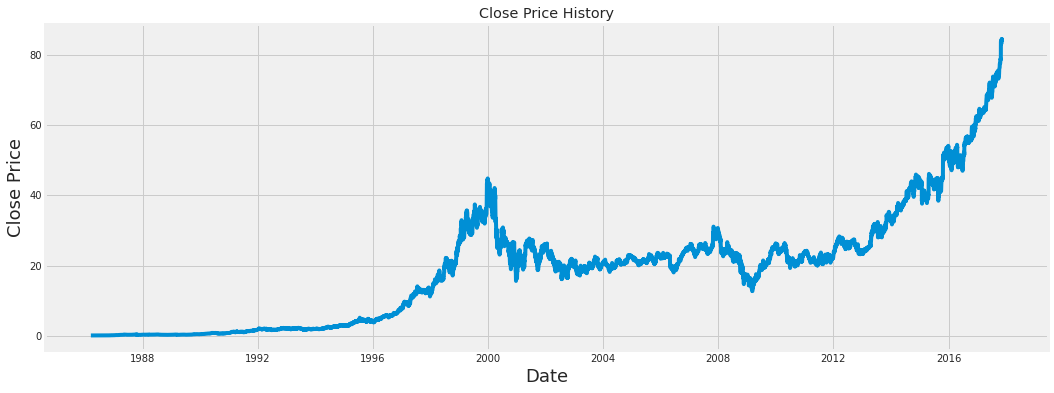

In [65]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(df_MSFT['CLOSE'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()


In [80]:
# Create a new dataframe with only the 'Close column 
data = df_MSFT.filter(['CLOSE'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len


7584

In [81]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data


array([[9.62212165e-05],
       [9.62212165e-05],
       [9.62212165e-05],
       ...,
       [1.00000000e+00],
       [9.94437396e-01],
       [9.91833624e-01]])

In [68]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 61:
        print(x_train)
        print(y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape


[array([9.62212165e-05, 9.62212165e-05, 9.62212165e-05, 9.62212165e-05,
       9.62212165e-05, 9.62212165e-05, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 9.62212165e-05, 9.62212165e-05,
       0.00000000e+00, 9.62212165e-05, 9.62212165e-05, 9.62212165e-05,
       0.00000000e+00, 9.62212165e-05, 9.62212165e-05, 9.62212165e-05,
       9.62212165e-05, 9.62212165e-05, 9.62212165e-05, 9.62212165e-05,
       9.62212165e-05, 9.62212165e-05, 9.62212165e-05, 9.62212165e-05,
       9.62212165e-05, 1.97531624e-04, 2.96119906e-04, 2.96119906e-04,
       1.97531624e-04, 1.97531624e-04, 1.97531624e-04, 1.97531624e-04,
       1.97531624e-04, 1.97531624e-04, 1.97531624e-04, 1.97531624e-04,
       1.97531624e-04, 1.97531624e-04, 1.97531624e-04, 1.97531624e-04,
       1.97531624e-04, 1.97531624e-04, 1.97531624e-04, 1.97531624e-04,
       1.97531624e-04, 1.97531624e-04, 1.97531624e-04, 1.97531624e-04,
       1.97531624e-04, 2.96119906e-04, 2.96119906e-04, 2.96119906e-04,
     

In [82]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[9.62212165e-05],
       [9.62212165e-05],
       [9.62212165e-05],
       ...,
       [1.00000000e+00],
       [9.94437396e-01],
       [9.91833624e-01]])

In [83]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)


7524/7524 [==============================] - 254s 33ms/step - loss: 2.4606e-04


In [84]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse


2.410429913651261

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


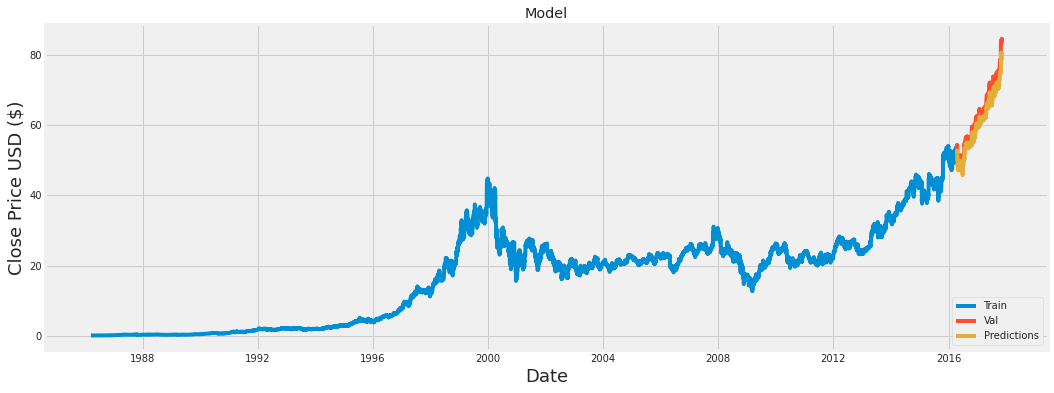

In [86]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['CLOSE'])
plt.plot(valid[['CLOSE', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()


In this notebook we have looked at data from the stock market with respect to different companies, particularly some technology stocks. We have used pandas to get stock information,we have used libraries like matplotlib and seaborn to visualize different aspects of it, and finally we have performed feature scaling and based on its previous performance history we have built a model to predict future stock prices through a Long Short Term Memory (LSTM) method.